In [ ]:
!pip install astroNN

     |████████████████████████████████| 9.3 MB 18.1 MB/s 
     |████████████████████████████████| 4.4 MB 57.5 MB/s 
     |████████████████████████████████| 802 kB 36.4 MB/s 
     |████████████████████████████████| 53 kB 2.7 MB/s 
     |████████████████████████████████| 3.2 MB 69.0 MB/s 
  Created wheel for astroNN: filename=astroNN-1.0.1-py3-none-any.whl size=9284594 sha256=add222e9cd2f10eedc0be0cc4338d6d3f98f293eb671790eed0858631682fdef
  Stored in directory: /root/.cache/pip/wheels/26/a4/7e/4cbf2a7f9cd51929da9d09345e8cd37c647b54825a1314dd2d
  Created wheel for mimeparse: filename=mimeparse-0.1.3-py3-none-any.whl size=3864 sha256=f751c4638704a97c12b1f4cf6723b0555708a666c72f82fd177e11c49939fe37
  Stored in directory: /root/.cache/pip/wheels/49/b4/2d/0081759ae1833bd694024801f7aacddcda8a687e8d5fbaeebd
Successfully built astroNN mimeparse


In [ ]:
from astroNN.datasets import galaxy10
from astroNN.datasets.galaxy10 import galaxy10cls_lookup
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [ ]:
#Please note that in recent times, loading data via api has been giving some error. Hence the below cell when executed will cause an error and hence not loading up the data. To load the data, please download the data set in .h5 file and use it seperately. A script to do that will be soon made available in a seperate repo
images, labels = galaxy10.load_data()
labels = labels.astype(np.float32)
labels = to_categorical(labels)
images = images.astype(np.float32)
images = images/255

Galaxy10.h5:  98%|█████████▊| 205M/210M [00:02<00:00, 78.2MB/s]

Downloaded Galaxy10 successfully to /root/.astroNN/datasets/Galaxy10.h5


Galaxy10.h5: 210MB [00:02, 72.6MB/s]                           


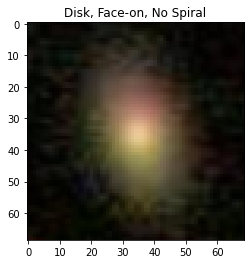

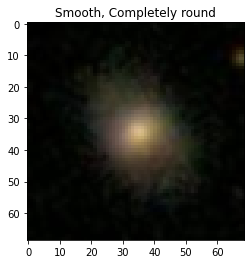

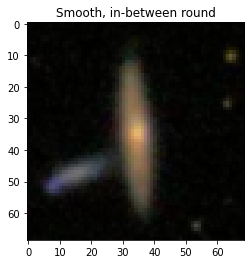

In [ ]:
def show_image(image_data,label):
    label = galaxy10cls_lookup(int(label))
    plt.imshow(image_data)
    plt.title(label)
    plt.show()
for i in range(3):
    show_image(images[i], i)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.15)

print(X_test.shape)
print(y_test.shape)


(3268, 69, 69, 3)
(3268, 10)


In [ ]:

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=(69,69,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 67, 67, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 65, 65, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0

In [ ]:
print(images.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21785, 69, 69, 3)
(18517, 69, 69, 3)
(18517, 10)
(3268, 69, 69, 3)
(3268, 10)


In [ ]:
history = model.compile(
loss='categorical_crossentropy',
optimizer='Adam',
metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, 
validation_data=(X_test, y_test))

Epoch 1/20
579/579 [==============================] - 56s 18ms/step - loss: 1.7092 - accuracy: 0.3224 - val_loss: 1.3342 - val_accuracy: 0.4862
Epoch 2/20
579/579 [==============================] - 9s 15ms/step - loss: 1.3456 - accuracy: 0.4593 - val_loss: 1.0787 - val_accuracy: 0.6010
Epoch 3/20
579/579 [==============================] - 9s 15ms/step - loss: 1.0965 - accuracy: 0.5851 - val_loss: 1.0808 - val_accuracy: 0.5998
Epoch 4/20
579/579 [==============================] - 9s 15ms/step - loss: 0.9579 - accuracy: 0.6570 - val_loss: 0.7811 - val_accuracy: 0.7084
Epoch 5/20
579/579 [==============================] - 9s 15ms/step - loss: 0.8602 - accuracy: 0.6895 - val_loss: 0.9129 - val_accuracy: 0.6741
Epoch 6/20
579/579 [==============================] - 9s 15ms/step - loss: 0.7838 - accuracy: 0.7174 - val_loss: 0.6969 - val_accuracy: 0.7378
Epoch 7/20
579/579 [==============================] - 9s 15ms/step - loss: 0.7324 - accuracy: 0.7391 - val_loss: 0.7173 - val_accuracy: 0.720

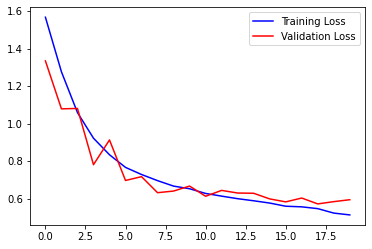

In [ ]:
plt.plot(model.history.history['loss'],color='b',
label='Training Loss')
plt.plot(model.history.history['val_loss'],color='r',
label='Validation Loss')
plt.legend()
plt.show()

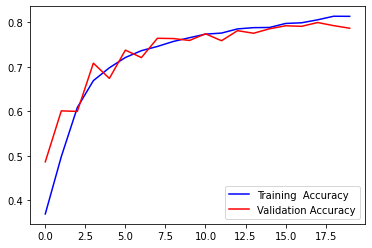

In [ ]:
plt.plot(model.history.history['accuracy'],color='b',
label='Training  Accuracy')
plt.plot(model.history.history['val_accuracy'],color='r',
label='Validation Accuracy')
plt.legend()
plt.show()

[7.8825027e-01 3.9311250e-05 1.5532050e-02 1.1429179e-05 1.1615036e-04
 8.5898328e-12 3.1304435e-07 1.1909774e-01 5.6826469e-02 2.0126237e-02]
0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


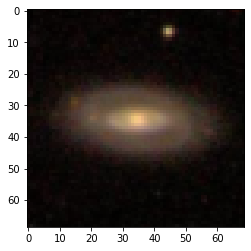

In [ ]:
prediction=model.predict(X_test)

plt.imshow(X_test[584])
print(prediction[584])
print(np.argmax(prediction[584]))
print(y_test[584])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.argmax(axis=1), prediction.argmax(axis=1))
cm

array([[247,  77,  93,   2,   2,   0,   1,  61,  25,   5],
       [ 14, 989,  49,   0,   0,   0,   0,   7,   0,   0],
       [ 22,  34, 842,   1,   1,   0,   0,   2,   0,   0],
       [  6,   0,   9,  24,  18,   0,  13,   0,   0,   0],
       [  4,   1,  13,   6, 187,   0,  12,   0,   0,   2],
       [  0,   0,   0,   0,   2,   0,   0,   0,   0,   0],
       [  2,   0,   0,   3,  10,   0,  69,   0,   0,   0],
       [ 32,   6,   6,   1,   1,   0,   0, 121,  15,   1],
       [ 27,   2,   0,   0,   0,   0,   0,  41,  72,   2],
       [ 20,   1,   2,   1,   4,   0,   4,   1,  32,  21]])

In [ ]:
def precision(label, confusion_matrix):
    col = confusion_matrix[:, label]
    return confusion_matrix[label, label] / col.sum()
    
def recall(label, confusion_matrix):
    row = confusion_matrix[label, :]
    return confusion_matrix[label, label] / row.sum()

def precision_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_precisions = 0
    for label in range(rows):
        sum_of_precisions += precision(label, confusion_matrix)
    return sum_of_precisions / rows

def recall_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_recalls = 0
    for label in range(columns):
        sum_of_recalls += recall(label, confusion_matrix)
    return sum_of_recalls / columns

In [ ]:
print("label precision recall")
for label in range(10):
    print(f"{label:5d} {precision(label, cm):9.3f} {recall(label, cm):6.3f}")

label precision recall
    0     0.660  0.481
    1     0.891  0.934
    2     0.830  0.933
    3     0.632  0.343
    4     0.831  0.831
    5       nan  0.000
    6     0.697  0.821
    7     0.519  0.661
    8     0.500  0.500
    9     0.677  0.244


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:

print("precision total:", precision_macro_average(cm))

print("recall total:", recall_macro_average(cm))

precision total: nan
recall total: 0.5749647597746927


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:

def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements

In [ ]:
accuracy(cm)

0.7870257037943696